PREPROCESSING

In [68]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/home/abdurrehman/Documents/PROJECT/covid19_tweets.csv'
data = pd.read_csv(file_path)

data


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [69]:
# checking missing values and their percentage
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                  Missing Values  Percentage
user_name                      0    0.000000
user_location              36771   20.530071
user_description           10286    5.742904
user_created                   0    0.000000
user_followers                 0    0.000000
user_friends                   0    0.000000
user_favourites                0    0.000000
user_verified                  0    0.000000
date                           0    0.000000
text                           0    0.000000
hashtags                   51334   28.660920
source                        77    0.042991
is_retweet                     0    0.000000


In [86]:
columns_to_drop = ['hashtags']  # List all columns that may have unhashable types
df_hashable = data.drop(columns=columns_to_drop)

# Step 2: Identify duplicated rows in the DataFrame
duplicated_rows = df_hashable.duplicated(keep=False)

# Step 3: Filter the DataFrame to show only duplicated rows
duplicated_rows_df = data[duplicated_rows]  # Use original df to keep all data

# Step 4: Count the number of times each duplicated row appears
duplicate_counts = duplicated_rows_df.groupby(df_hashable.columns.tolist()).size().reset_index(name='count')

# Display the DataFrame of duplicated rows and their counts
print("Duplicated rows in the DataFrame:")
print(duplicated_rows_df)
print("\nCounts of duplicated rows:")
print(duplicate_counts)

Duplicated rows in the DataFrame:
Empty DataFrame
Columns: [user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, hashtags, source, is_retweet]
Index: []

Counts of duplicated rows:
Empty DataFrame
Columns: [user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, source, is_retweet, count]
Index: []


In [70]:
#converting to lower case 
data['user_name'] = data['user_name'].str.lower()
data['user_location'] = data['user_location'].str.lower()
data['user_description'] = data['user_description'].str.lower()
data['text'] = data['text'].str.lower()

In [71]:
# cleaning unnecessary characters and whitespaces
data['user_description'] = data['user_description'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
data['text'] = data['text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ꮙꭵ☻լꂅϯ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,if i smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,tom basile 🇺🇸,"new york, ny","husband, father, columnist & commentator. auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,hey @yankees @yankeespr and @mlb - wouldn't it...,NaN,Twitter for Android,False
2,time4fisticuffs,"pewee valley, ky",#christian #catholic #conservative #reagan #re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realdonaldtrump trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,stuck in the middle,#browns #indians #clevelandproud #[]_[] #cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv the one gift #covid19 has give me...,['COVID19'],Twitter for iPhone,False
4,dipr-j&k,jammu and kashmir,official twitter handle of department of infor...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 july : media bulletin on novel #coronavirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [72]:
data.dtypes


user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [73]:
# converting 'hashtags' column from string representation of list to actual list
data['hashtags'] = data['hashtags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

data.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ꮙꭵ☻լꂅϯ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,if i smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,tom basile 🇺🇸,"new york, ny","husband, father, columnist & commentator. auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,hey @yankees @yankeespr and @mlb - wouldn't it...,NaN,Twitter for Android,False
2,time4fisticuffs,"pewee valley, ky",#christian #catholic #conservative #reagan #re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realdonaldtrump trump nev...,[COVID19],Twitter for Android,False
3,ethel mertz,stuck in the middle,#browns #indians #clevelandproud #[]_[] #cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv the one gift #covid19 has give me...,[COVID19],Twitter for iPhone,False
4,dipr-j&k,jammu and kashmir,official twitter handle of department of infor...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 july : media bulletin on novel #coronavirus...,"[CoronaVirusUpdates, COVID19]",Twitter for Android,False


In [74]:
#handling missing values 
data['user_location'].fillna('unknown', inplace=True)
data['user_description'].fillna('', inplace=True)
data['source'].fillna('unknown', inplace=True)

data.head()


/tmp/ipykernel_11160/555032798.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['user_location'].fillna('unknown', inplace=True)
/tmp/ipykernel_11160/555032798.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ꮙꭵ☻լꂅϯ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,if i smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,tom basile 🇺🇸,"new york, ny","husband, father, columnist & commentator. auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,hey @yankees @yankeespr and @mlb - wouldn't it...,NaN,Twitter for Android,False
2,time4fisticuffs,"pewee valley, ky",#christian #catholic #conservative #reagan #re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realdonaldtrump trump nev...,[COVID19],Twitter for Android,False
3,ethel mertz,stuck in the middle,#browns #indians #clevelandproud #[]_[] #cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv the one gift #covid19 has give me...,[COVID19],Twitter for iPhone,False
4,dipr-j&k,jammu and kashmir,official twitter handle of department of infor...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 july : media bulletin on novel #coronavirus...,"[CoronaVirusUpdates, COVID19]",Twitter for Android,False


In [77]:
with open('hashtags.txt', 'w') as file:
    for hashtags in df['hashtags']:
        # Skip NaN values
        if pd.isna(hashtags):
            continue
        
        # Handle if hashtags is a string with comma-separated hashtags
        if isinstance(hashtags, str):
            hashtags = hashtags.split(',')  # Split by comma if it's a string
        
        # Handle if hashtags is already a list
        if isinstance(hashtags, list):
            for hashtag in hashtags:
                # Ensure no leading/trailing whitespace
                hashtag = hashtag.strip()
                if hashtag:  # Skip empty hashtags
                    file.write(f"{hashtag}\n")

print("Hashtags have been written to 'hashtags.txt'.")

Hashtags have been written to 'hashtags.txt'.


In [78]:
# Clean hashtags.txt file
with open('hashtags.txt', 'r') as infile, open('cleaned_hashtags.txt', 'w') as outfile:
    for line in infile:
        # Strip unwanted characters and split lines that contain multiple hashtags
        cleaned_line = line.strip().strip("[]'").replace("'", "").replace("[", "").replace("]", "")
        if cleaned_line:
            hashtags = cleaned_line.split(',')
            for hashtag in hashtags:
                hashtag = hashtag.strip()
                if hashtag:
                    outfile.write(f"{hashtag}\n")


In [81]:
import json

# Step 1: Select relevant columns
selected_columns = ['user_name', 'user_followers', 'user_favourites', 'user_verified', 'is_retweet']
df_selected = data[selected_columns]

# Step 2: Clean data
# Remove rows with missing values in these columns
df_cleaned = df_selected.dropna()

# Step 3: Convert to JSON format
# Convert DataFrame to JSON with each row as a JSON object
json_data = df_cleaned.to_json(orient='records', lines=True)

# Save JSON data to a file
with open('user_influence_data.json', 'w') as file:
    file.write(json_data)

print("JSON file 'user_influence_data.json' has been created successfully.")


JSON file 'user_influence_data.json' has been created successfully.


In [90]:
# Load the text file into a DataFrame
data = pd.read_csv('/home/abdurrehman/Documents/PROJECT/hashtagpopularity.txt', sep='\t')

# Clean up the DataFrame (if necessary)
data.columns = ['HASHTAG', 'COUNT']
data['COUNT'] = data['COUNT'].str.strip()
data['COUNT'] = pd.to_numeric(data['COUNT'], errors='coerce')

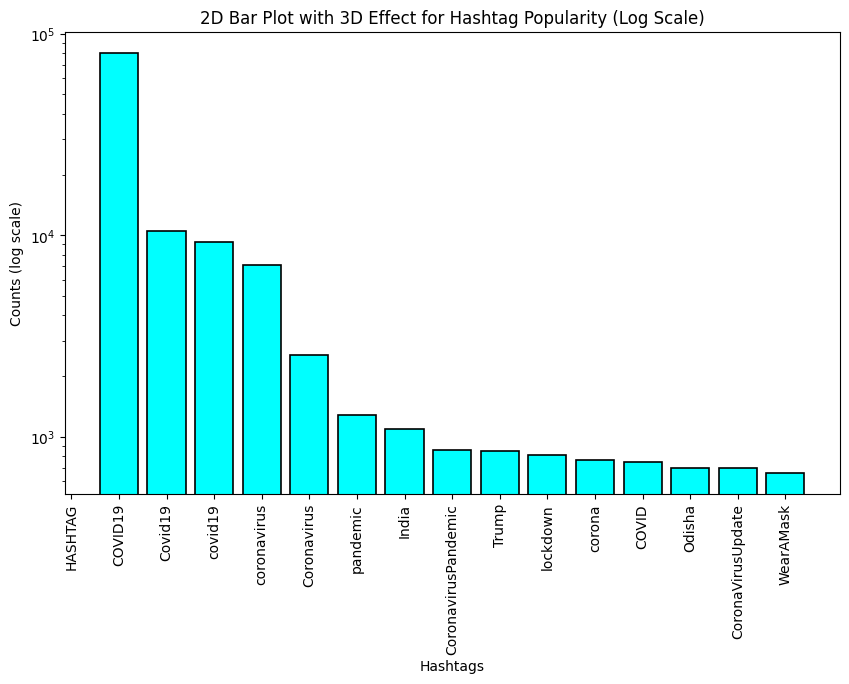

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `data` is your DataFrame with 'HASHTAG' and 'COUNT' columns
hashtags = data['HASHTAG']
counts = data['COUNT']
x_pos = np.arange(len(hashtags))

fig, ax = plt.subplots(figsize=(10, 6))

# Create 2D bar plot with 3D appearance
bars = ax.bar(x_pos, counts, color='skyblue', edgecolor='blue', linewidth=2)

# Adding a 3D effect by shading the bars
for bar in bars:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.2)
    bar.set_facecolor('cyan')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Customizing the plot
ax.set_xticks(x_pos)
ax.set_xticklabels(hashtags, rotation=90)
ax.set_xlabel('Hashtags')
ax.set_ylabel('Counts (log scale)')
ax.set_title('2D Bar Plot with 3D Effect for Hashtag Popularity (Log Scale)')

# Display the plot
plt.show()


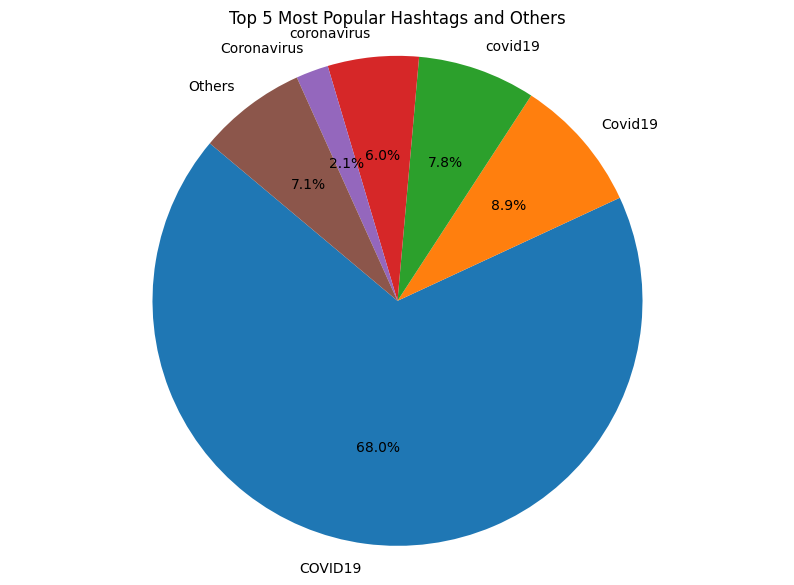

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/home/abdurrehman/Documents/PROJECT/hashtagpopularity.txt', sep='\t')
data.columns = ['HASHTAG', 'COUNT']
data['COUNT'] = data['COUNT'].str.strip()
data['COUNT'] = pd.to_numeric(data['COUNT'], errors='coerce')

# Handle NaN values
data = data.dropna(subset=['COUNT'])  # Drop rows where 'COUNT' is NaN
if data.empty:
    raise ValueError("DataFrame is empty after dropping NaN values.")

data['COUNT'] = data['COUNT'].astype(int)  # Convert 'COUNT' to integer

# Sort the data by COUNT and select top 5
top_5 = data.nlargest(5, 'COUNT')
others = data[~data.index.isin(top_5.index)]
others_total = others['COUNT'].sum()

# Combine top 5 and 'Others'
others_df = pd.DataFrame({'HASHTAG': ['Others'], 'COUNT': [others_total]})
final_data = pd.concat([top_5, others_df])

# Prepare data for plotting
hashtags = final_data['HASHTAG']
counts = final_data['COUNT']

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(counts, labels=hashtags, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.title('Top 5 Most Popular Hashtags and Others')
plt.show()


In [9]:
from collections import defaultdict

# Initialize a dictionary to keep track of the number of requests per client
client_request_count = defaultdict(int)

# Open and read the file
with open('/home/abdurrehman/Documents/PROJECT3/small_data.txt', 'r') as file:
    for line in file:
        # Split each line into components
        components = line.strip().split()
        if len(components) == 5:
            request_id, client_id, endpoint, timestamp, servers_down = components
            # Increment the count for the client
            client_request_count[client_id] += 1

# Convert the dictionary to a list of tuples and sort it by client ID
sorted_clients = sorted(client_request_count.items(), key=lambda x: int(x[0][1:]))

# Print the total number of requests by each client in sorted order
for client_id, count in sorted_clients:
    print(f"Client {client_id}: {count} requests")


Client c01: 31 requests
Client c02: 16 requests
Client c03: 21 requests
Client c04: 19 requests
Client c05: 23 requests
Client c06: 25 requests
Client c07: 25 requests
Client c08: 24 requests
Client c09: 19 requests
Client c10: 18 requests


In [11]:
# Open and read the file
with open('/home/abdurrehman/Documents/PROJECT3/small_data.txt', 'r') as file:
    for line in file:
        # Split each line into components
        components = line.strip().split()
        if len(components) == 5:
            request_id, client_id, endpoint, timestamp, servers_down = components
            # Print the line if the client ID matches 'c01'
            if client_id == 'c01':
                print(line.strip())



r043 c01 payment/submit 00:00:41 3.0
r154 c01 user/profile 00:01:40 1.0
r209 c01 cart/add 00:00:39 1.0
r212 c01 cart/add 00:01:56 1.0
r175 c01 user/settings 00:00:12 3.0
r040 c01 cart/remove 00:00:09 3.0
r001 c01 payment/submit 00:00:53 3.0
r198 c01 cart/remove 00:00:29 3.0
r229 c01 payment/submit 00:01:16 2.0
r276 c01 order/checkout 00:01:00 3.0
r277 c01 payment/submit 00:00:05 2.0
r007 c01 support/ticket 00:00:46 1.0
r177 c01 user/settings 00:01:19 1.0
r147 c01 user/settings 00:00:40 1.0
r018 c01 product/details 00:00:22 1.0
r194 c01 cart/remove 00:00:06 1.0
r103 c01 payment/submit 00:01:51 2.0
r082 c01 user/settings 00:00:49 3.0
r215 c01 payment/submit 00:01:57 3.0
r143 c01 order/history 00:01:55 3.0
r295 c01 user/settings 00:01:54 3.0
r004 c01 cart/add 00:01:53 3.0
r061 c01 product/details 00:01:21 2.0
r090 c01 product/search 00:01:07 3.0
r248 c01 support/ticket 00:01:48 2.0
r067 c01 user/profile 00:00:45 2.0
r284 c01 cart/add 00:00:44 1.0
r245 c01 product/search 00:01:01 2.0
r065 

In [1]:
# Initialize dictionaries to store requests and predictions
requests = {}
predictions = {}

# Open and read the file
with open('/home/abdurrehman/Documents/PROJECT3/small_data.txt', 'r') as file:
    for line in file:
        components = line.strip().split()
        
        # If the line has 5 elements, it's a request line
        if len(components) == 5:
            request_id, client_id, endpoint, timestamp, servers_down = components
            if client_id == 'c01':  # Filter only requests for client 'c01'
                requests[request_id] = (client_id, endpoint, timestamp, servers_down)
        
        # If the line has 2 elements, it's a prediction line
        elif len(components) == 2:
            request_id, predicted_status_code = components
            predictions[request_id] = predicted_status_code

# Print out the requests for 'c01' and their corresponding predicted status code
for request_id, request_data in requests.items():
    if request_id in predictions:
        predicted_status = predictions[request_id]
        client_id, endpoint, timestamp, servers_down = request_data
        print(f"{request_id} {client_id} {endpoint} {timestamp} {servers_down} {predicted_status}")
    else:
        print(f"{request_id} {client_id} {endpoint} {timestamp} {servers_down} No prediction available")


r043 c01 payment/submit 00:00:41 3.0 200
r154 c01 user/profile 00:01:40 1.0 500
r209 c01 cart/add 00:00:39 1.0 500
r212 c01 cart/add 00:01:56 1.0 500
r175 c01 user/settings 00:00:12 3.0 200
r040 c01 cart/remove 00:00:09 3.0 200
r001 c01 payment/submit 00:00:53 3.0 500
r198 c01 cart/remove 00:00:29 3.0 500
r229 c01 payment/submit 00:01:16 2.0 200
r276 c01 order/checkout 00:01:00 3.0 200
r277 c01 payment/submit 00:00:05 2.0 200
r007 c01 support/ticket 00:00:46 1.0 200
r177 c01 user/settings 00:01:19 1.0 200
r147 c01 user/settings 00:00:40 1.0 200
r018 c01 product/details 00:00:22 1.0 500
r194 c01 cart/remove 00:00:06 1.0 200
r103 c01 payment/submit 00:01:51 2.0 200
r082 c01 user/settings 00:00:49 3.0 200
r215 c01 payment/submit 00:01:57 3.0 200
r143 c01 order/history 00:01:55 3.0 200
r295 c01 user/settings 00:01:54 3.0 500
r004 c01 cart/add 00:01:53 3.0 200
r061 c01 product/details 00:01:21 2.0 200
r090 c01 product/search 00:01:07 3.0 500
r248 c01 support/ticket 00:01:48 2.0 200
r067 c01

In [1]:
# Open the file
with open('/home/abdurrehman/Documents/PROJECT3/stage1_output.txt', 'r') as file:
    # Loop through each line in the file
    for line in file:
        # Check if 'c01' is in the line
        if 'c01' in line:
            # Print the line
            print(line.strip())


r146 c01 user/profile 00:00:01 0.0 200 500
r277 c01 payment/submit 00:00:05 2.0 200 200
r194 c01 cart/remove 00:00:06 1.0 200 200
r040 c01 cart/remove 00:00:09 3.0 500 200
r175 c01 user/settings 00:00:12 3.0 500 200
r065 c01 support/ticket 00:00:15 1.0 200 500
r018 c01 product/details 00:00:22 1.0 200 500
r198 c01 cart/remove 00:00:29 3.0 500 500
r209 c01 cart/add 00:00:39 1.0 200 500
r147 c01 user/settings 00:00:40 1.0 200 200
r043 c01 payment/submit 00:00:41 3.0 500 200
r284 c01 cart/add 00:00:44 1.0 200 200
r067 c01 user/profile 00:00:45 2.0 200 500
r007 c01 support/ticket 00:00:46 1.0 200 200
r082 c01 user/settings 00:00:49 3.0 500 200
r001 c01 payment/submit 00:00:53 3.0 500 500
r129 c01 user/settings 00:00:55 3.0 500 200
r276 c01 order/checkout 00:01:00 3.0 500 200
r245 c01 product/search 00:01:01 2.0 200 200
r090 c01 product/search 00:01:07 3.0 500 500
r229 c01 payment/submit 00:01:16 2.0 200 200
r177 c01 user/settings 00:01:19 1.0 200 200
r061 c01 product/details 00:01:21 2.0 2

In [2]:
# Open the file
with open('/home/abdurrehman/Documents/PROJECT3/stage1_output.txt', 'r') as file:
    # Loop through each line in the file
    for line in file:
        # Check if both 'c01' and 'payment/submit' are in the line
        if 'c01' in line and 'payment/submit' in line:
            # Print the line
            print(line.strip())


r277 c01 payment/submit 00:00:05 2.0 200 200
r043 c01 payment/submit 00:00:41 3.0 500 200
r001 c01 payment/submit 00:00:53 3.0 500 500
r229 c01 payment/submit 00:01:16 2.0 200 200
r289 c01 payment/submit 00:01:27 0.0 200 200
r181 c01 payment/submit 00:01:32 2.0 200 500
r103 c01 payment/submit 00:01:51 2.0 200 200
r215 c01 payment/submit 00:01:57 3.0 500 200


In [3]:
# Open the file
with open('/home/abdurrehman/Documents/PROJECT3/stage1_output.txt', 'r') as file:
    # Initialize a list to store the previous lines
    previous_lines = []
    
    # Loop through each line in the file
    for line in file:
        # Check if both 'c01' and 'payment/submit' are in the current line
        if 'c01' in line and 'payment/submit' in line:
            # Print the three previous lines and the current line
            for prev_line in previous_lines:
                print(prev_line.strip())
            print(line.strip())

            # Add a line break after the 'c01' line
            print()  # This will create the line break after printing the 'c01' line

        # Add the current line to the previous_lines list
        previous_lines.append(line)

        # Keep only the last 3 lines in the list
        if len(previous_lines) > 3:
            previous_lines.pop(0)


r180 c08 cart/add 00:00:01 3.0 500 500
r178 c03 product/search 00:00:03 0.0 200 500
r224 c10 user/profile 00:00:04 0.0 200 200
r277 c01 payment/submit 00:00:05 2.0 200 200
r294 c08 cart/add 00:00:39 1.0 200 500
r162 c09 support/ticket 00:00:39 0.0 200 500
r147 c01 user/settings 00:00:40 1.0 200 200
r043 c01 payment/submit 00:00:41 3.0 500 200
r244 c07 user/profile 00:00:52 0.0 200 500
r283 c09 user/profile 00:00:52 0.0 200 200
r176 c10 product/details 00:00:52 0.0 200 200
r001 c01 payment/submit 00:00:53 3.0 500 500
r246 c08 product/details 00:01:14 0.0 200 200
r110 c02 user/profile 00:01:15 2.0 200 200
r166 c07 support/ticket 00:01:15 2.0 200 200
r229 c01 payment/submit 00:01:16 2.0 200 200
r002 c09 payment/submit 00:01:25 3.0 500 500
r253 c02 payment/submit 00:01:26 3.0 500 500
r259 c09 product/search 00:01:26 3.0 500 200
r289 c01 payment/submit 00:01:27 0.0 200 200
r104 c02 order/history 00:01:31 2.0 200 500
r011 c03 product/search 00:01:31 2.0 200 500
r242 c10 payment/submit 00:01: